In [1]:
import tensorflow as tf

In [2]:
from tensorflow import keras
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [4]:
x_train.shape

(50000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [6]:
x_train=x_train/255.0
x_test=x_test/255.0

In [7]:
X = np.concatenate((x_train,x_test))
y = np.concatenate((y_train,y_test))

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=9000, random_state=42)

In [9]:
print(X.shape)

(60000, 32, 32, 3)


In [10]:
X_train.shape

(51000, 32, 32, 3)

In [11]:
y_test

array([[1],
       [9],
       [2],
       ...,
       [3],
       [0],
       [3]], dtype=uint8)

In [12]:
y_test.shape

(9000, 1)

If your Yi
's are one-hot encoded, use categorical_crossentropy. Examples (for a 3-class classification): [1,0,0] , [0,1,0], [0,0,1]

But if your Yi
's are integers, use sparse_categorical_crossentropy. Examples for above 3-class classification problem: [1] , [2], [3]

In [13]:
from keras.utils import to_categorical
# one hot encode target values
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [14]:

print(y_train[100])

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


In [15]:
print(y_train[10])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [16]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape = [32,32,3]),
    keras.layers.Dense(100, activation = "relu"),
    keras.layers.Dense(80, activation = "relu"),
    keras.layers.Dense(80, activation = "selu"),
    keras.layers.Dense(10, activation = "softmax")

])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 100)               307300    
                                                                 
 dense_1 (Dense)             (None, 80)                8080      
                                                                 
 dense_2 (Dense)             (None, 80)                6480      
                                                                 
 dense_3 (Dense)             (None, 10)                810       
                                                                 
Total params: 322670 (1.23 MB)
Trainable params: 322670 (1.23 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
model.compile(loss = "categorical_crossentropy",
              optimizer = "sgd",metrics=['accuracy'])

In [20]:
hist = model.fit(X_train,y_train, epochs=50 , validation_split=0.15)

Epoch 1/50
1355/1355 [==============================] - 8s 5ms/step - loss: 1.9069 - accuracy: 0.3123 - val_loss: 1.8129 - val_accuracy: 0.3403
Epoch 2/50
1355/1355 [==============================] - 8s 6ms/step - loss: 1.7120 - accuracy: 0.3873 - val_loss: 1.7225 - val_accuracy: 0.3763
Epoch 3/50
1355/1355 [==============================] - 6s 4ms/step - loss: 1.6326 - accuracy: 0.4191 - val_loss: 1.6606 - val_accuracy: 0.4080
Epoch 4/50
1355/1355 [==============================] - 8s 6ms/step - loss: 1.5829 - accuracy: 0.4349 - val_loss: 1.5979 - val_accuracy: 0.4259
Epoch 5/50
1355/1355 [==============================] - 7s 5ms/step - loss: 1.5369 - accuracy: 0.4510 - val_loss: 1.5547 - val_accuracy: 0.4403
Epoch 6/50
1355/1355 [==============================] - 7s 5ms/step - loss: 1.5087 - accuracy: 0.4603 - val_loss: 1.5372 - val_accuracy: 0.4490
Epoch 7/50
1355/1355 [==============================] - 7s 5ms/step - loss: 1.4802 - accuracy: 0.4714 - val_loss: 1.5315 - val_accuracy:

In [21]:
model.save("my_first_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [22]:
model.evaluate(X_test,y_test)

282/282 [==============================] - 1s 4ms/step - loss: 1.5056 - accuracy: 0.4987


[1.5055724382400513, 0.4986666738986969]

In [32]:
y_pred = model.predict(X_test)

282/282 [==============================] - 1s 3ms/step


In [23]:
print(hist.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [24]:
import matplotlib.pyplot as plt

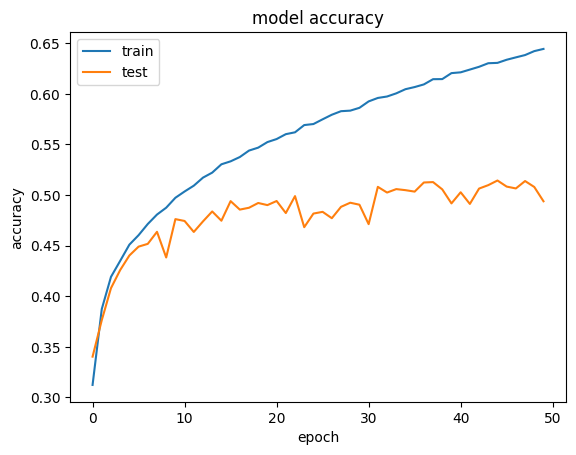

In [25]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

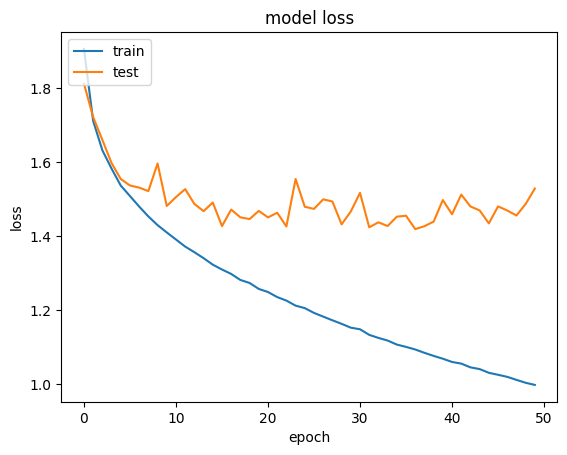

In [26]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [19]:
!pip install keras-tuner -q
import keras_tuner

In [20]:
from keras import layers

In [21]:
def build_model(hp):
    model = keras.Sequential()
    model.add(layers.Flatten())
    # Tune the number of layers.
    for i in range(hp.Int("num_layers", 1, 3)):
        model.add(
            layers.Dense(
                # Tune number of units separately.
                units=hp.Int(f"units_{i}", min_value=32, max_value=512, step=32),
                activation=hp.Choice("activation", ["relu", "tanh"]),
            )
        )
    if hp.Boolean("dropout"):
        model.add(layers.Dropout(rate=0.25))
    model.add(layers.Dense(10, activation="softmax"))
    learning_rate = hp.Float("lr", min_value=1e-4, max_value=1e-2, sampling="log")
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
        loss="categorical_crossentropy",
        metrics=["accuracy"],
    )
    return model


build_model(keras_tuner.HyperParameters())

In [22]:
tuner = keras_tuner.RandomSearch(
    hypermodel=build_model,
    objective="val_accuracy",
    max_trials=3,
    executions_per_trial=2,
    overwrite=True,
    directory="my_dir",
    project_name="helloworld",
)

In [23]:
x_train = X_train[:45000]
x_val = X_train[45000:]
y_tr = y_train[:45000]
y_val = y_train[45000:]

In [24]:
x_val.shape

(6000, 32, 32, 3)

In [25]:
tuner.search(x_train, y_tr, epochs=2, validation_data=(x_val, y_val))

Trial 3 Complete [00h 02m 50s]
val_accuracy: 0.3764999955892563

Best val_accuracy So Far: 0.3779999911785126
Total elapsed time: 00h 06m 03s


In [27]:
best_model = tuner.get_best_models()[0]

In [29]:
best_model

In [30]:
tuner.results_summary()

Results summary
Results in my_dir/helloworld
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 0 summary
Hyperparameters:
num_layers: 2
units_0: 64
activation: relu
dropout: False
lr: 0.00044155083635231995
units_1: 32
Score: 0.3779999911785126

Trial 2 summary
Hyperparameters:
num_layers: 3
units_0: 512
activation: tanh
dropout: False
lr: 0.00028018589905574664
units_1: 352
units_2: 32
Score: 0.3764999955892563

Trial 1 summary
Hyperparameters:
num_layers: 2
units_0: 352
activation: tanh
dropout: False
lr: 0.00857899245397964
units_1: 448
Score: 0.10008333250880241


In [35]:
y_test.shape

(9000, 10)

In [36]:
y_pred.shape

(9000, 10)